[['donald', 'john', 'trump', 'born', 'june', 'is', 'an', 'american', 'politician', 'media', 'personality', 'and', 'businessman', 'who', 'served', 'as', 'the', 'th', 'president', 'of', 'the', 'united', 'states', 'from', 'to', 'having', 'won', 'the', 'presidential', 'election', 'as', 'the', 'nominee', 'of', 'the', 'republican', 'party', 'he', 'is', 'the', 'presidentelect', 'and', 'will', 'be', 'inaugurated', 'as', 'the', 'th', 'president', 'on', 'january', 'trump', 'graduated', 'with', 'a', 'bachelors', 'degree', 'in', 'economics', 'from', 'the', 'university', 'of', 'pennsylvania', 'in', 'he', 'became', 'president', 'of', 'the', 'trump', 'family', 'real', 'estate', 'business', 'in', 'and', 'focused', 'on', 'luxury', 'accommodations', 'after', 'a', 'series', 'of', 'business', 'bankruptcies', 'in', 'the', 's', 'he', 'launched', 'several', 'side', 'ventures', 'from', 'to', 'he', 'produced', 'and', 'hosted', 'the', 'reality', 'television', 'series', 'the', 'apprenticetrump', 'won', 'the', 'p

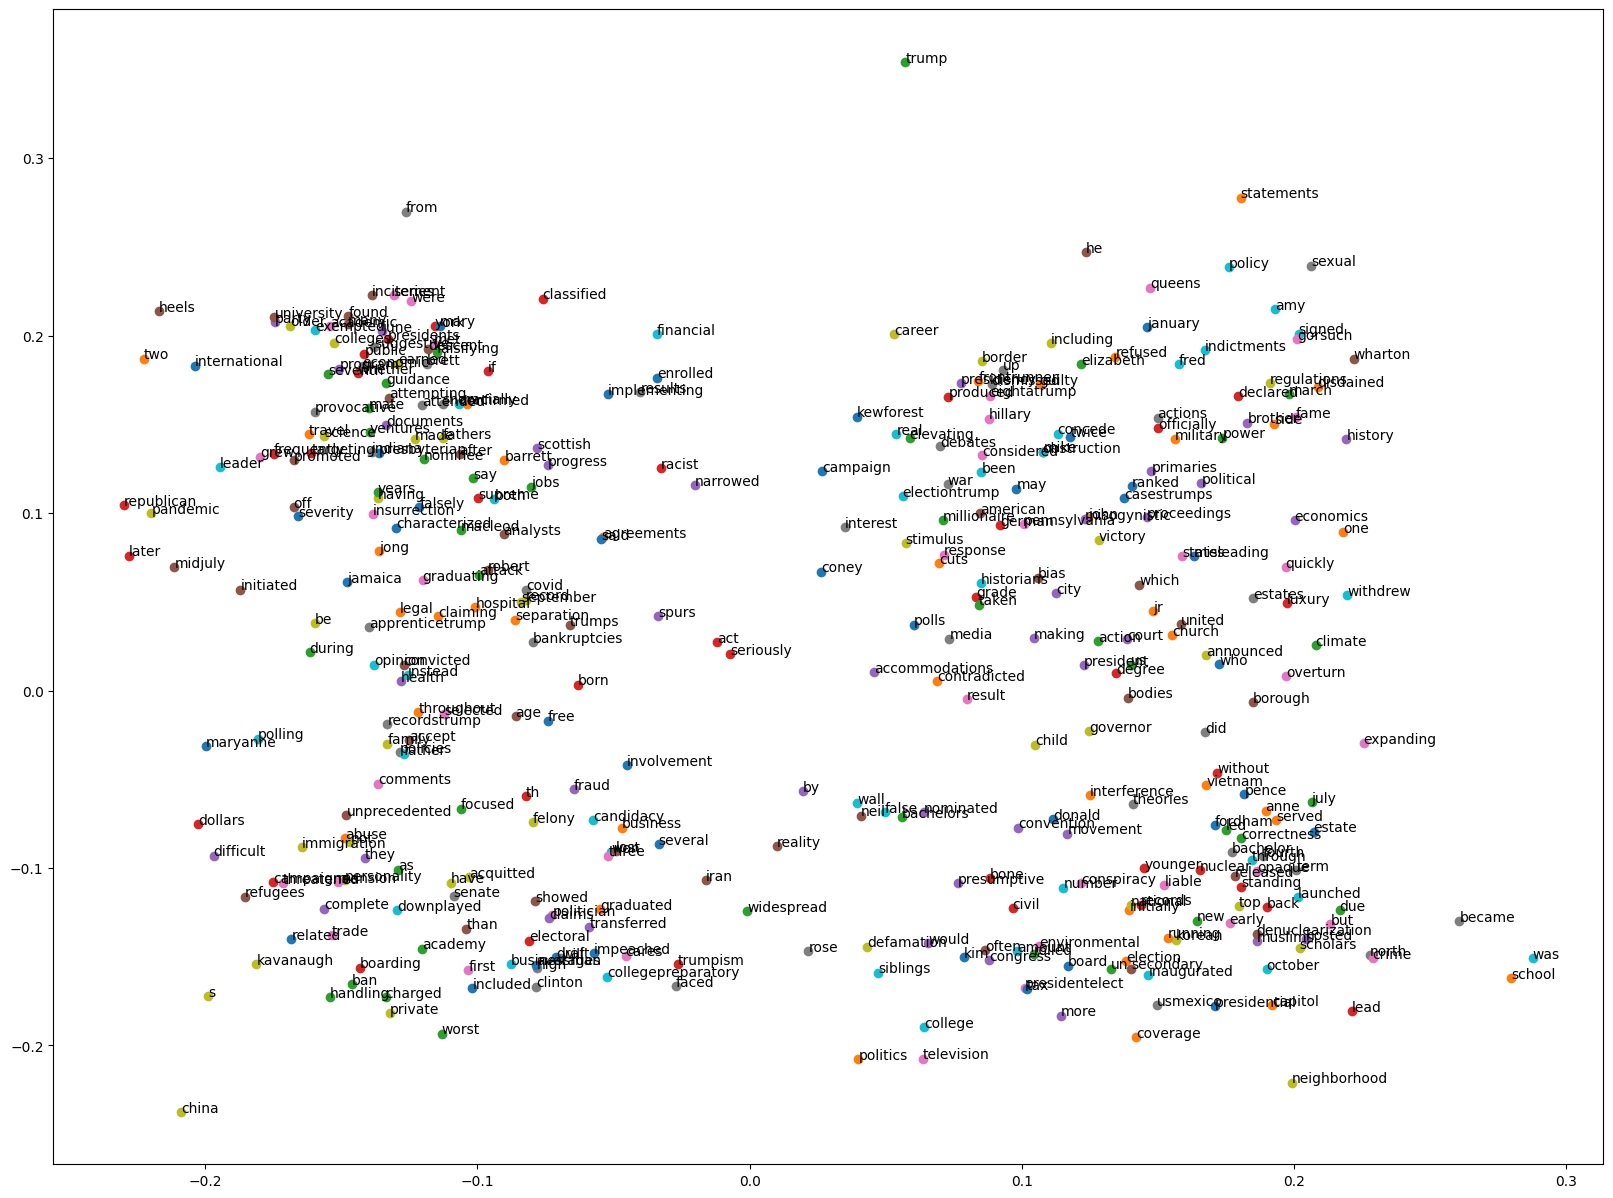

In [38]:
import tokelib as tk
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
import os

def get_corpus():
    sentences = []
    directory = "/workspaces/nlp/practicas/etc/corpus_1.txt"
    with open(directory, 'r', encoding='utf-8') as file:
        sentences.append(file.read())
    return sentences

def pre_built(n_gram_size: int):
    sentences = get_corpus()

    corpus = [tk.tokenize(sentence, parser=' ') for sentence in sentences]
    print(corpus)
    corpus = [tk.remove_stopwords(doc, english=True) for doc in corpus]

    vocabulary = tk.get_vocabulary(corpus=corpus, is_nested=True)
    n_grams = tk.get_n_grams(n=n_gram_size, corpus=corpus)
    vocab_index = tk.get_word_index(vocabulary=vocabulary)
    n_grams = tk.convert_ngrams_numbers(ngrams=n_grams, vocab_index=vocab_index)

    vocab_size = len(vocabulary)
    
    X = [ngram[:-1] for ngram in n_grams]
    Y = [ngram[-1] for ngram in n_grams]

    X_one_hot = np.array([tk.one_hot_encode(ngram, vocab_size) for ngram in X])
    Y_one_hot = np.array([tk.one_hot_encode([y], vocab_size)[0] for y in Y]) #[0] para quitar dimensión extra

    return X_one_hot, Y_one_hot, vocab_size, vocab_index, vocabulary

def build_model(X_one_hot, Y_one_hot, vocab_size):
    model = Sequential([
        Input(shape=(X_one_hot.shape[1], vocab_size)),  # Ajusta la entrada al tamaño correcto
        Flatten(),  # Asegura que la salida sea plana
        Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
        Dense(vocab_size, activation='softmax')  # Salida ajustada al vocabulario
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_one_hot, Y_one_hot, epochs=30)
    return model

# Entrenamiento
n = 3
X_one_hot, Y_one_hot, vocab_size, vocab_index, vocabulary = pre_built(n_gram_size=n)
model = build_model(X_one_hot, Y_one_hot, vocab_size)

##
weights = model.get_weights()[0]

word_embeddings = {}
for word in vocabulary:
    word_embeddings[word] = weights[vocab_index[word]]

print(word_embeddings)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))  # Ajusta el tamaño de la figura (ancho, alto)
for word in list(vocab_index.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
plt.savefig('img.jpg')
